In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [23]:
url = 'https://raw.githubusercontent.com/ronyhait14/spam-detection/main/spam.csv'
df = pd.read_csv(url, encoding='latin-1')

df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
df = df.rename(columns={'v2': 'message'})
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

df.head()

,v1,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


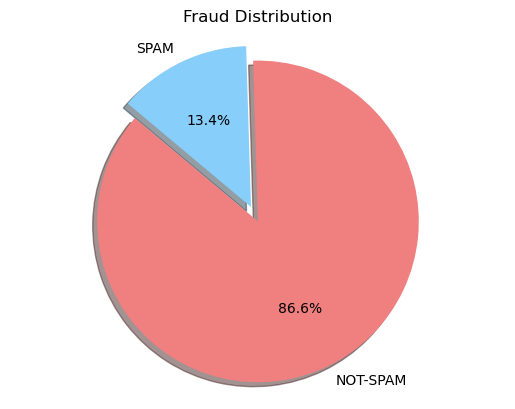

In [32]:
import matplotlib.pyplot as plt


spam_counts = df['v1'].value_counts()

# Create a pie chart
labels = ['NOT-SPAM', 'SPAM']
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.1)  

plt.pie(spam_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Fraud Distribution')
plt.show()


In [54]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)




In [59]:
# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the sum of TF-IDF scores for each feature across all documents
tfidf_sum = X_train_tfidf.sum(axis=0)

# Create a DataFrame to associate feature names with their TF-IDF sums
feature_df = pd.DataFrame({'word': feature_names, 'tfidf_sum': tfidf_sum.A1})

# Sort the DataFrame by TF-IDF sum in descending order
top_words = feature_df.sort_values(by='tfidf_sum', ascending=False).head(10)

# Print the top 10 most frequent words
print("Top 10 Most Frequent Words:")
print(top_words[['word', 'tfidf_sum']])


Top 10 Most Frequent Words:
      word   tfidf_sum
4945   you  203.941494
4172    to  175.505649
4052   the  124.975176
1700    in  102.945602
2092    me   99.676128
405    and   94.757457
1755    is   94.021741
2231    my   86.559454
1764    it   86.528296
4951  your   80.018537


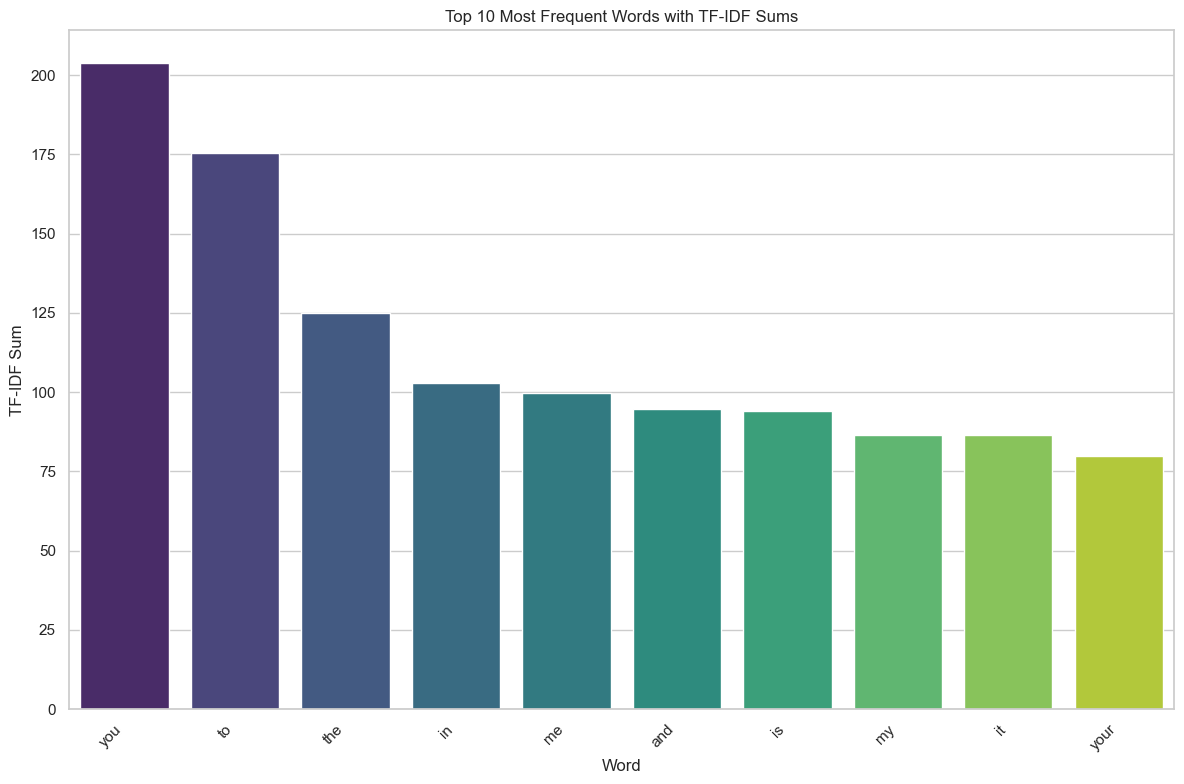

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn style
sns.set(style="whitegrid")

# bar graph
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='word', y='tfidf_sum', data=top_words, palette="viridis")

# Customize the plot
plt.title('Top 10 Most Frequent Words with TF-IDF Sums')
plt.xlabel('Word')
plt.ylabel('TF-IDF Sum')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [50]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['v1'], test_size=0.2, random_state=42)


In [37]:
def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{classification_rep}')



In [38]:
# Naive Bayes classifier
nb_classifier = MultinomialNB()
print("\nNaive Bayes Classifier:")
train_and_evaluate_classifier(nb_classifier, X_train_tfidf, y_train, X_test_tfidf, y_test)



Naive Bayes Classifier:
Accuracy: 96.68%
Confusion Matrix:
[[965   0]
 [ 37 113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [39]:

# Logistic Regression classifier
lr_classifier = LogisticRegression()
print("\nLogistic Regression Classifier:")
train_and_evaluate_classifier(lr_classifier, X_train_tfidf, y_train, X_test_tfidf, y_test)




Logistic Regression Classifier:
Accuracy: 96.77%
Confusion Matrix:
[[964   1]
 [ 35 115]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [40]:
# Support Vector Machines (SVM) classifier
svm_classifier = SVC()
print("\nSupport Vector Machines (SVM) Classifier:")
train_and_evaluate_classifier(svm_classifier, X_train_tfidf, y_train, X_test_tfidf, y_test)



Support Vector Machines (SVM) Classifier:
Accuracy: 98.03%
Confusion Matrix:
[[965   0]
 [ 22 128]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

